<a href="https://colab.research.google.com/github/sidharth0909/Encryptix/blob/main/Movie_genre_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movie genre prediction Project**


This Project lets you to understand the basic of Machine leaning Projects. It also explores important concepts suchs as Lancaster Stemmer, Text Vectorization Ussing TF-IDF, and the Naive bayes model

Definitons

1. Lancaster Stemmmer: This initializes the Lancaster Stemmer, a tool used in natural language processing (NLP) to reduce words to their root form (e.g., "running" to "run"). This process is known as stemming.

2. stopwords.words('english'): This retrieves a list of common English stopwords from the NLTK library (like "the", "and", "is"), which are often removed from text during preprocessing because they don't carry significant meaning.

3. Box plot: A box plot provides a visual summary of one or more sets of data. It displays the distribution's median, quartiles, and potential outliers.

4. Violin plot: A violin plot is similar to a box plot but with a rotated kernel density plot on each side.

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d hijest/genre-classification-dataset-imdb

Dataset URL: https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb
License(s): other
 94% 39.0M/41.7M [00:02<00:00, 21.8MB/s]
100% 41.7M/41.7M [00:03<00:00, 14.5MB/s]


In [3]:
# import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

Unzip The file


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/genre-classification-dataset-imdb.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Load the Train Dataset

In [5]:
train_path = "/content/Genre Classification Dataset/train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [6]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Nature's Fury: Storm of the Century (2006),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [8]:
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [9]:
train_data.tail()

,Title,Genre,Description
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...
54214,Nature's Fury: Storm of the Century (2006),history,"On Labor Day Weekend, 1935, the most intense ..."


In [10]:
train_data.columns

Index(['Title', 'Genre', 'Description'], dtype='object')

In [11]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

Load the Train Dataset

In [14]:
test_data_path = "/content/Genre Classification Dataset/test_data.txt"
test_data = pd.read_csv(test_data_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')

In [15]:
test_data.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [16]:
test_data.tail()

,Id,Title,Description
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."
54199,54200,Curitiba Zero Grau (2010),"Curitiba is a city in movement, with rhythms ..."


# **Visualization and Exploratory data analysis**

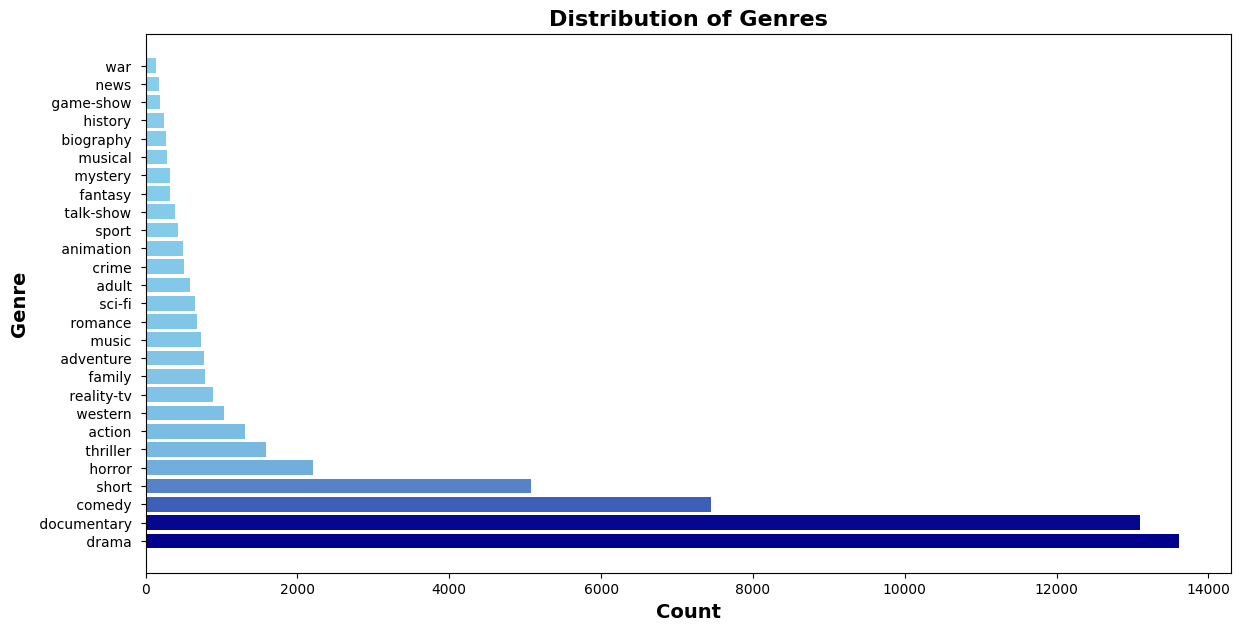

In [17]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Get the counts of each genre
genre_counts = train_data['Genre'].value_counts()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Create a colormap that goes from dark to light
cmap = mcolors.LinearSegmentedColormap.from_list('custom_gradient', ['skyblue', 'darkblue'])

# Normalize the counts to use with the colormap
normalize = mcolors.Normalize(vmin=genre_counts.min(), vmax=genre_counts.max())

# Apply the colormap to the normalized counts to get the colors
colors = cmap(normalize(genre_counts.values))

# Plot the data
ax.barh(genre_counts.index, genre_counts.values, color=colors)

# Set the labels and title
ax.set_xlabel('Count', fontsize=14, fontweight='bold')
ax.set_ylabel('Genre', fontsize=14, fontweight='bold')
ax.set_title('Distribution of Genres', fontsize=16, fontweight='bold')

# Show the plot
plt.show()


Plotted the disribution of Genre using heatmap

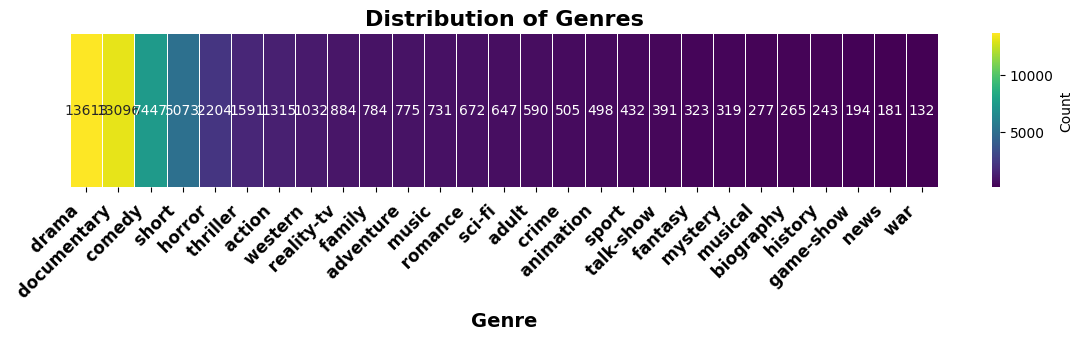

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each genre
genre_counts = train_data['Genre'].value_counts()

# Convert to DataFrame for easier manipulation with Seaborn
genre_counts_df = pd.DataFrame(genre_counts).reset_index()
genre_counts_df.columns = ['Genre', 'Count']

# Create a pivot table, which is not necessary here, but keeping data frame format
heatmap_data = genre_counts_df.set_index('Genre').T

# Create a heatmap
plt.figure(figsize=(14, 2))  # Adjust the height to make it more like a bar
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="viridis", cbar_kws={'label': 'Count'}, linewidths=0.5)

# Set the labels and title
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')

# Hide y-axis label since it's not necessary in this context
plt.yticks([])

# Show the plot
plt.show()


# **Data Preprocessing and Text Cleaning**

In [19]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))


In [21]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [22]:
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)  # Remove image URLs
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only alphabetic characters and apostrophes
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Remove single characters
    text = "".join([i for i in text if i not in string.punctuation])  # Remove punctuation
    words = nltk.word_tokenize(text)  # Tokenize text into words
    stopwords = nltk.corpus.stopwords.words('english')  # List of stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])  # Remove stopwords and short words
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove extra spaces
    return text


In [23]:
train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)


In [24]:
train_data['length_Text_cleaning'] = train_data['Text_cleaning'].apply(len)


Visualize the distribution of text lengths using Box plot and Violin Plot

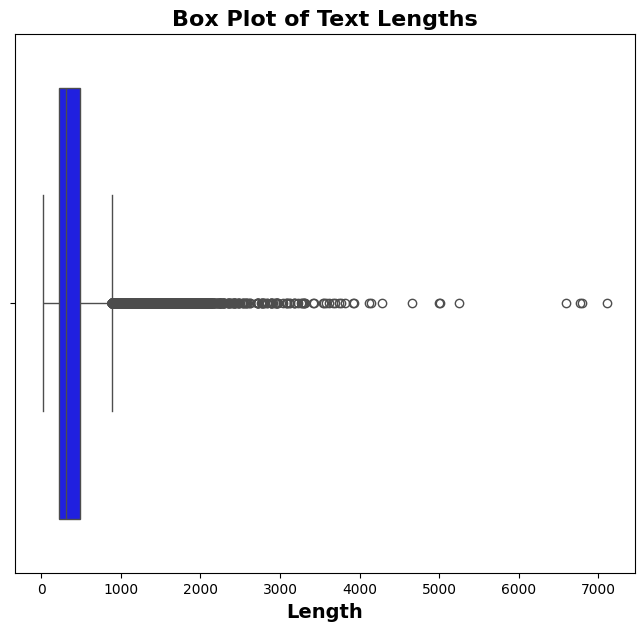

In [25]:
# box Plot

plt.figure(figsize=(8, 7))
sns.boxplot(data=train_data, x='length_Text_cleaning', color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.title('Box Plot of Text Lengths', fontsize=16, fontweight='bold')
plt.show()


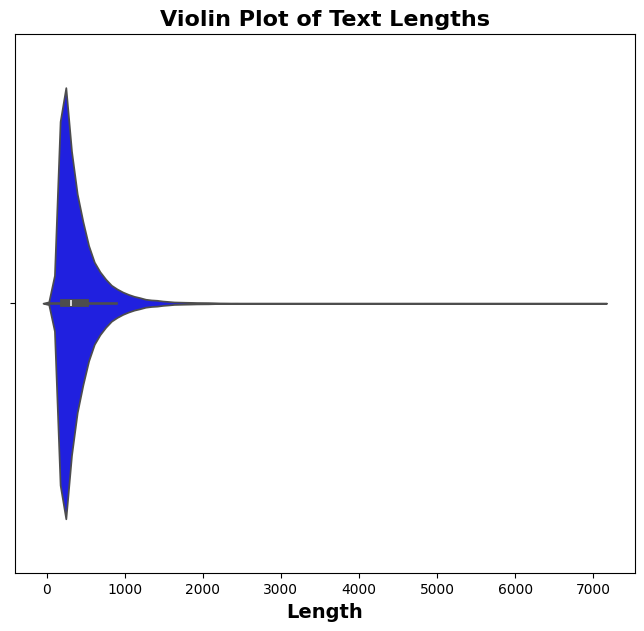

In [26]:
# Violin Plot

plt.figure(figsize=(8, 7))
sns.violinplot(data=train_data, x='length_Text_cleaning', color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.title('Violin Plot of Text Lengths', fontsize=16, fontweight='bold')
plt.show()


Text Vectorization Using TF-IDF

In [27]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()


In [28]:
# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])


In [29]:
# Transform the test data
X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])


# Split Data and Train a Model

In [31]:
# Check shapes to diagnose the issue
print("Shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)


Shapes:
X_train: (43371, 124210)
y_train: (43371,)
X_val: (10843, 124210)
y_val: (10843,)


In [30]:
X = X_train
y = train_data['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Initialize and train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)


MultinomialNB()

In [33]:
# Make predictions on the validation set
y_pred = classifier.predict(X_val)


In [34]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))


Validation Accuracy: 0.44526422576777647
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.61      0.04      0.07      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.90      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Prediciton on Test Data**

In [37]:
X_test_predictions = classifier.predict(X_test)
test_data['Predicted_Genre'] = X_test_predictions

In [38]:
test_data.to_csv('predicted_genres.csv', index=False)

# Display the 'test_data' DataFrame with predicted genres
print(test_data)

          Id                             Title  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             Description  \
0       L.R. Brane loves his life - his car, his apar...   
1       Spain, March 1964: Quico is a very naughty ch...   
2       One year in the life of Albin and his family ...   
3       His father has died, he hasn't spoken with hi...   
4       Before he was known internationally as a mart...   
...                                    

In [41]:
# Display summary statistics of the predicted genres
summary_stats = test_data['Predicted_Genre'].describe()
print("\nSummary Statistics of Predicted Genres:")
print(summary_stats)



Summary Statistics of Predicted Genres:
count       54200
unique          4
top        drama 
freq        31889
Name: Predicted_Genre, dtype: object


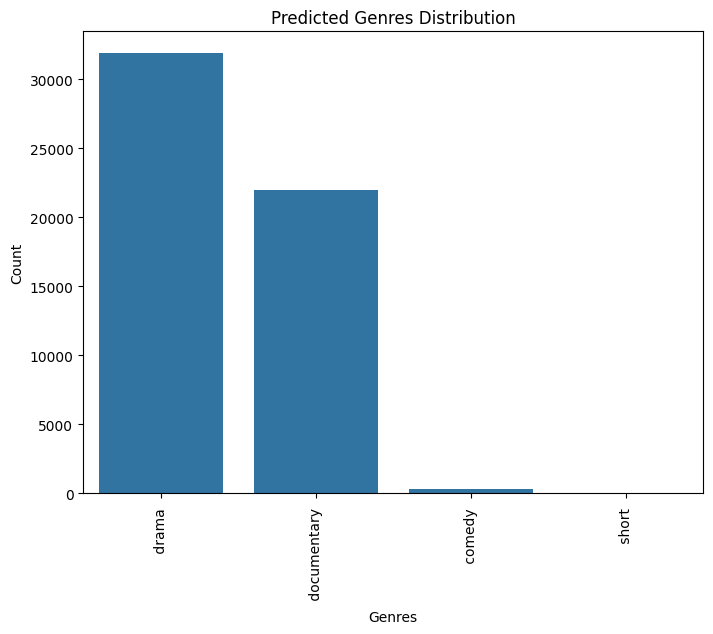

In [46]:
# Visualize the distribution of predicted genres
plt.figure(figsize=(8, 6))
sns.countplot(x='Predicted_Genre', data=test_data)
plt.title('Predicted Genres Distribution')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


References:
1. https://www.kaggle.com/imgowthamg
2. https://www.youtube.com/watch?v=Ld531P_-dk0